# Tutorial 2: Feature importance - (RG)

---

The aim of this notebook, is to reorder the 2074 columns according to their importance

First, let us recall the data from the previous notebook

In [1]:
%store -r df_input_RG
%store -r y_RG
%store -r df_RG


<b><i> Data splitting </i></b> 

In [2]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( df_input_RG, y_RG, test_size = 0.3, random_state=3, stratify=y_RG) # train and valid sets

In [3]:
print(Xtrain.shape)
print(Xtest.shape)

(393, 2074)
(169, 2074)


---

<b><i> Permutation Importance </i></b> 

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from random import *
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
# featImp_RG = [] # an empty list to store the important features

In [ ]:
# for i in range (1000): # we will take the average of 1000 permutations, with different sizes and random splits (you can increase the number for it to be more robust)
#     print("itr: " + str(i))
    
#     RandomStateValid = randrange(50)
#     ranodmSplitValid = random.uniform(0.2, 0.5)
#     XtrainPer, XvalidPer, YtrainPer, YvalidPer = train_test_split( np.array(Xtrain), np.array(Ytrain), test_size = ranodmSplitValid, random_state=RandomStateValid, stratify=Ytrain) # train and valid sets
#     print("Train shape: "+str(XtrainPer.shape))
#     print("Valid shape: "+str(XvalidPer.shape))
#     print()
   
#     # train
#     model = RandomForestClassifier(n_estimators=50, random_state=0, n_jobs = -1)
#     model.fit(XtrainPer, YtrainPer)
    
#     results = permutation_importance(model, XvalidPer, YvalidPer, scoring='precision_macro', n_repeats = 10, n_jobs = -1)
#     importance = results.importances_mean
#     # print(importance)

#     featImp_RG.append(importance)

itr: 0
Train shape: (207, 2074)
Valid shape: (186, 2074)

itr: 1
Train shape: (265, 2074)
Valid shape: (128, 2074)

itr: 2
Train shape: (216, 2074)
Valid shape: (177, 2074)

itr: 3
Train shape: (279, 2074)
Valid shape: (114, 2074)

itr: 4
Train shape: (299, 2074)
Valid shape: (94, 2074)

itr: 5
Train shape: (301, 2074)
Valid shape: (92, 2074)

itr: 6
Train shape: (253, 2074)
Valid shape: (140, 2074)

itr: 7
Train shape: (283, 2074)
Valid shape: (110, 2074)

itr: 8
Train shape: (198, 2074)
Valid shape: (195, 2074)

itr: 9
Train shape: (282, 2074)
Valid shape: (111, 2074)

itr: 10
Train shape: (306, 2074)
Valid shape: (87, 2074)

itr: 11
Train shape: (254, 2074)
Valid shape: (139, 2074)

itr: 12
Train shape: (214, 2074)
Valid shape: (179, 2074)

itr: 13
Train shape: (274, 2074)
Valid shape: (119, 2074)



In [ ]:
# %store featImp_RG

In [3]:
%store -r featImp_RG
np.array(featImp_RG).shape

(1000, 2074)

In [4]:
arrimp = np.array(featImp_RG).mean(0)
sorted_idx = arrimp.argsort()
print(sorted_idx[-10:])

[1316 1284 1093 1290   60 1034 1068 1029 1070 1107]


---

<b><i> Graph importance</i></b> 

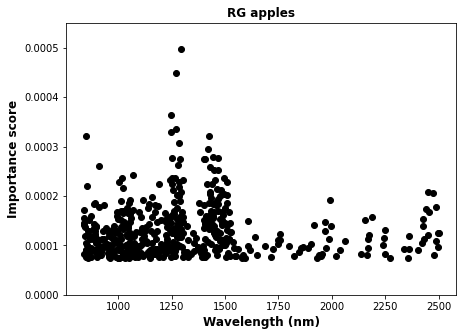

In [5]:
n = 500
rand  = np.random.randint(len(y_RG), size= n)

plt.rcParams["figure.figsize"] = (7,5)# 'xtick.labelsize', 'ytick.labelsize'
plt.scatter(df_input_RG.columns[sorted_idx][-n:], arrimp[sorted_idx][-n:], color = 'black')


plt.title("RG apples", fontweight ='bold', fontsize =12)    
plt.xlabel("Wavelength (nm)", fontweight ='bold', fontsize =12)
plt.ylabel("Importance score", fontweight ='bold', fontsize =12)
plt.ylim([0, .00055])
plt.show()

The problem with Permutation importance that it suffers when features are highly correlated [(ref)](https://christophm.github.io/interpretable-ml-book/feature-importance.html). Regardless the above figure is importnat beacuse it shows that there are regoins which are more importnat than others. 

---